#Today's problem involves analyzing car data. This dataset comprises 1728 rows and 6 different attributes: buying price, price of maintenance, number of doors, capacity in terms of persons to carry, the relative size of the luggage boot, and the estimated safety value of each car.
#The Problem: You are tasked with constructing and evaluating a decision tree classifier on this dataset. Utilize and compare different types of split criteria (entropy, Gini index, loss). The decision tree will classify the type of car into one of the following categories: 1) unacceptable, 2) acceptable, 3) good, or 4) very good.

#In addition to developing an ML model, you also need to visualize a trees based on your developed models. The tree can be visualized using graphviz library.

#Note - This time, the data is split into several CSV files and stored in a zipped folder. You need to merge or concatenate the data after reading from multiple files.
#Resource for combining dataframes:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

#Resources for drawing a tree using Graphviz:

https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

https://canvas.anglia.ac.uk/files/4155049/download?download_frd=1



In [54]:
################################################################################
#
#

# Your code to develop a decision tree classifier.
# Check the accuracy, performance metrices, and confusion metrics.
# Draw the decision tree using Graphviz.
# You can split your code into different cells according to your own choice
#
#
################################################################################

In [4]:
#pip install pydotplus

In [5]:
from pandas import DataFrame, Series
from IPython.display import Image 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO
import pydotplus
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
%matplotlib inline

In [6]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from IPython.display import Image 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [7]:
df1 =pd.read_csv('car_evaluation_0.csv')
df1.tail()

buyPrice maintCost noDoors noPersons bootLuggage safety decision
427    vhigh       low   5more      more         med   high      acc
428    vhigh       low   5more      more         big    low    unacc
429    vhigh       low   5more      more         big    med      acc
430    vhigh       low   5more      more         big   high      acc
431     high     vhigh       2         2       small    low    unacc

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buyPrice     432 non-null    object
 1   maintCost    432 non-null    object
 2   noDoors      432 non-null    object
 3   noPersons    432 non-null    object
 4   bootLuggage  432 non-null    object
 5   safety       432 non-null    object
 6   decision     432 non-null    object
dtypes: object(7)
memory usage: 23.8+ KB


In [9]:
df2 = pd.read_csv('Car_evaluation_1.csv')
df2.tail()

buyPrice maintCost noDoors noPersons bootLuggage safety decision
427     high       low   5more      more         med   high      acc
428     high       low   5more      more         big    low    unacc
429     high       low   5more      more         big    med      acc
430     high       low   5more      more         big   high      acc
431      med     vhigh       2         2       small    low    unacc

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buyPrice     432 non-null    object
 1   maintCost    432 non-null    object
 2   noDoors      432 non-null    object
 3   noPersons    432 non-null    object
 4   bootLuggage  432 non-null    object
 5   safety       432 non-null    object
 6   decision     432 non-null    object
dtypes: object(7)
memory usage: 23.8+ KB


In [11]:
df3 = pd.read_csv('Car_evaluation_2.csv')
df3.tail()

buyPrice maintCost noDoors noPersons bootLuggage safety decision
427      med       low   5more      more         med   high    vgood
428      med       low   5more      more         big    low    unacc
429      med       low   5more      more         big    med     good
430      med       low   5more      more         big   high    vgood
431      low     vhigh       2         2       small    low    unacc

In [12]:
df3.info

<bound method DataFrame.info of     buyPrice maintCost noDoors noPersons bootLuggage safety decision
0        med     vhigh       2         2       small    med    unacc
1        med     vhigh       2         2       small   high    unacc
2        med     vhigh       2         2         med    low    unacc
3        med     vhigh       2         2         med    med    unacc
4        med     vhigh       2         2         med   high    unacc
..       ...       ...     ...       ...         ...    ...      ...
427      med       low   5more      more         med   high    vgood
428      med       low   5more      more         big    low    unacc
429      med       low   5more      more         big    med     good
430      med       low   5more      more         big   high    vgood
431      low     vhigh       2         2       small    low    unacc

[432 rows x 7 columns]>

In [13]:
df4 = pd.read_csv('car_evaluation_3.csv')
df4.tail()

buyPrice maintCost noDoors noPersons bootLuggage safety decision
426      low       low   5more      more         med    med     good
427      low       low   5more      more         med   high    vgood
428      low       low   5more      more         big    low    unacc
429      low       low   5more      more         big    med     good
430      low       low   5more      more         big   high    vgood

In [14]:
df4.info

<bound method DataFrame.info of     buyPrice maintCost noDoors noPersons bootLuggage safety decision
0        low     vhigh       2         2       small    med    unacc
1        low     vhigh       2         2       small   high    unacc
2        low     vhigh       2         2         med    low    unacc
3        low     vhigh       2         2         med    med    unacc
4        low     vhigh       2         2         med   high    unacc
..       ...       ...     ...       ...         ...    ...      ...
426      low       low   5more      more         med    med     good
427      low       low   5more      more         med   high    vgood
428      low       low   5more      more         big    low    unacc
429      low       low   5more      more         big    med     good
430      low       low   5more      more         big   high    vgood

[431 rows x 7 columns]>

In [15]:
df = pd.concat([df1, df2, df3, df4], ignore_index=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buyPrice     1727 non-null   object
 1   maintCost    1727 non-null   object
 2   noDoors      1727 non-null   object
 3   noPersons    1727 non-null   object
 4   bootLuggage  1727 non-null   object
 5   safety       1727 non-null   object
 6   decision     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [17]:
df['buyPrice'].value_counts()

high     432
med      432
low      432
vhigh    431
Name: buyPrice, dtype: int64

In [18]:
df['maintCost'].value_counts()

high     432
med      432
low      432
vhigh    431
Name: maintCost, dtype: int64

In [19]:
df['noDoors'].value_counts()

3        432
4        432
5more    432
2        431
Name: noDoors, dtype: int64

In [20]:
df['noPersons'].value_counts()

4       576
more    576
2       575
Name: noPersons, dtype: int64

In [21]:
df['bootLuggage'].value_counts()

med      576
big      576
small    575
Name: bootLuggage, dtype: int64

In [22]:
df['safety'].value_counts()

med     576
high    576
low     575
Name: safety, dtype: int64

In [23]:
df['decision'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: decision, dtype: int64

In [26]:
#replace low 1 med by 2 high by 3 vhigh by 4
df.replace(to_replace =["low", "med", "high", "vhigh"], value =[1,2,3,4], inplace =True)

In [27]:
#replace small by 1 and big by 3
df.replace(to_replace=["small", "big"], value=[1,3], inplace=True)

In [28]:
#replacing '2' by 2, '3' by 3, '4' by 4, 'smore by 5 and more' big by 5
df.replace(to_replace=["2", "3", "4", "5more", "more"], value=[2,3,4,5,5], inplace=True)

In [29]:
#for answers.decision
#replace 'low by 1', med by '2', gigh by '3, vhigh' by 4
df.replace(to_replace=["unacc", "acc", "good", "vgood"], value=[1,2,3,4,], inplace=True)

In [30]:
df

buyPrice  maintCost  noDoors  noPersons  bootLuggage  safety  decision
0            4          4        2          2            1       2         1
1            4          4        2          2            1       3         1
2            4          4        2          2            2       1         1
3            4          4        2          2            2       2         1
4            4          4        2          2            2       3         1
...        ...        ...      ...        ...          ...     ...       ...
1722         1          1        5          5            2       2         3
1723         1          1        5          5            2       3         4
1724         1          1        5          5            3       1         1
1725         1          1        5          5            3       2         3
1726         1          1        5          5            3       3         4

[1727 rows x 7 columns]

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   buyPrice     1727 non-null   int64
 1   maintCost    1727 non-null   int64
 2   noDoors      1727 non-null   int64
 3   noPersons    1727 non-null   int64
 4   bootLuggage  1727 non-null   int64
 5   safety       1727 non-null   int64
 6   decision     1727 non-null   int64
dtypes: int64(7)
memory usage: 94.6 KB


In [32]:
#memory size reduction
columns = ['buyPrice', 'maintCost', 'noDoors', 'noPersons', 'bootLuggage', 'safety', 'decision']
for column in columns:
    df[column] = pd.to_numeric(df[column], downcast='integer')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   buyPrice     1727 non-null   int8 
 1   maintCost    1727 non-null   int8 
 2   noDoors      1727 non-null   int8 
 3   noPersons    1727 non-null   int8 
 4   bootLuggage  1727 non-null   int8 
 5   safety       1727 non-null   int8 
 6   decision     1727 non-null   int8 
dtypes: int8(7)
memory usage: 11.9 KB


In [34]:
# reduce the memory size about 8 times
#get X from data
X= df.drop('decision', axis=1).values

In [35]:
# get y from data
y = df['decision'].values

In [36]:
# print shape of X and y to make sure everthing is good
#print shape of X
print(X.shape)

(1727, 6)


In [37]:
#print shape of y
print(y.shape)

(1727,)


In [38]:
print(X)

[[4 4 2 2 1 2]
 [4 4 2 2 1 3]
 [4 4 2 2 2 1]
 ...
 [1 1 5 5 3 1]
 [1 1 5 5 3 2]
 [1 1 5 5 3 3]]


In [39]:
print(y)

[1 1 1 ... 1 3 4]


In [40]:
#seperate for training(90%) and tes samples (10%)
#Random_state - it is an optional parameter, this is a seed for a eandom number generator
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size = 0.5, random_state = 30)

In [41]:
print(X_train.shape)
print(X_test.shape)

(863, 6)
(864, 6)


In [42]:
print (y_train.shape)
print (y_test.shape)

(863,)
(864,)


In [43]:
# Develop a Decision Tree Classifier based on Entropy split criteria 
# and fit into the train dataset
clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy = clf_entropy.fit(X_train, y_train)

In [44]:
feature_name = df.columns[:-1]
target_name = df.columns[-1]

print(feature_name, '\n')
print(target_name)

Index(['buyPrice', 'maintCost', 'noDoors', 'noPersons', 'bootLuggage',
       'safety'],
      dtype='object') 

decision


In [53]:
tree.export_graphviz(clf_entropy, out_file='tree_grid_clf_entropy.dot',
                     feature_names=feature_name,  
                     filled=True)
                

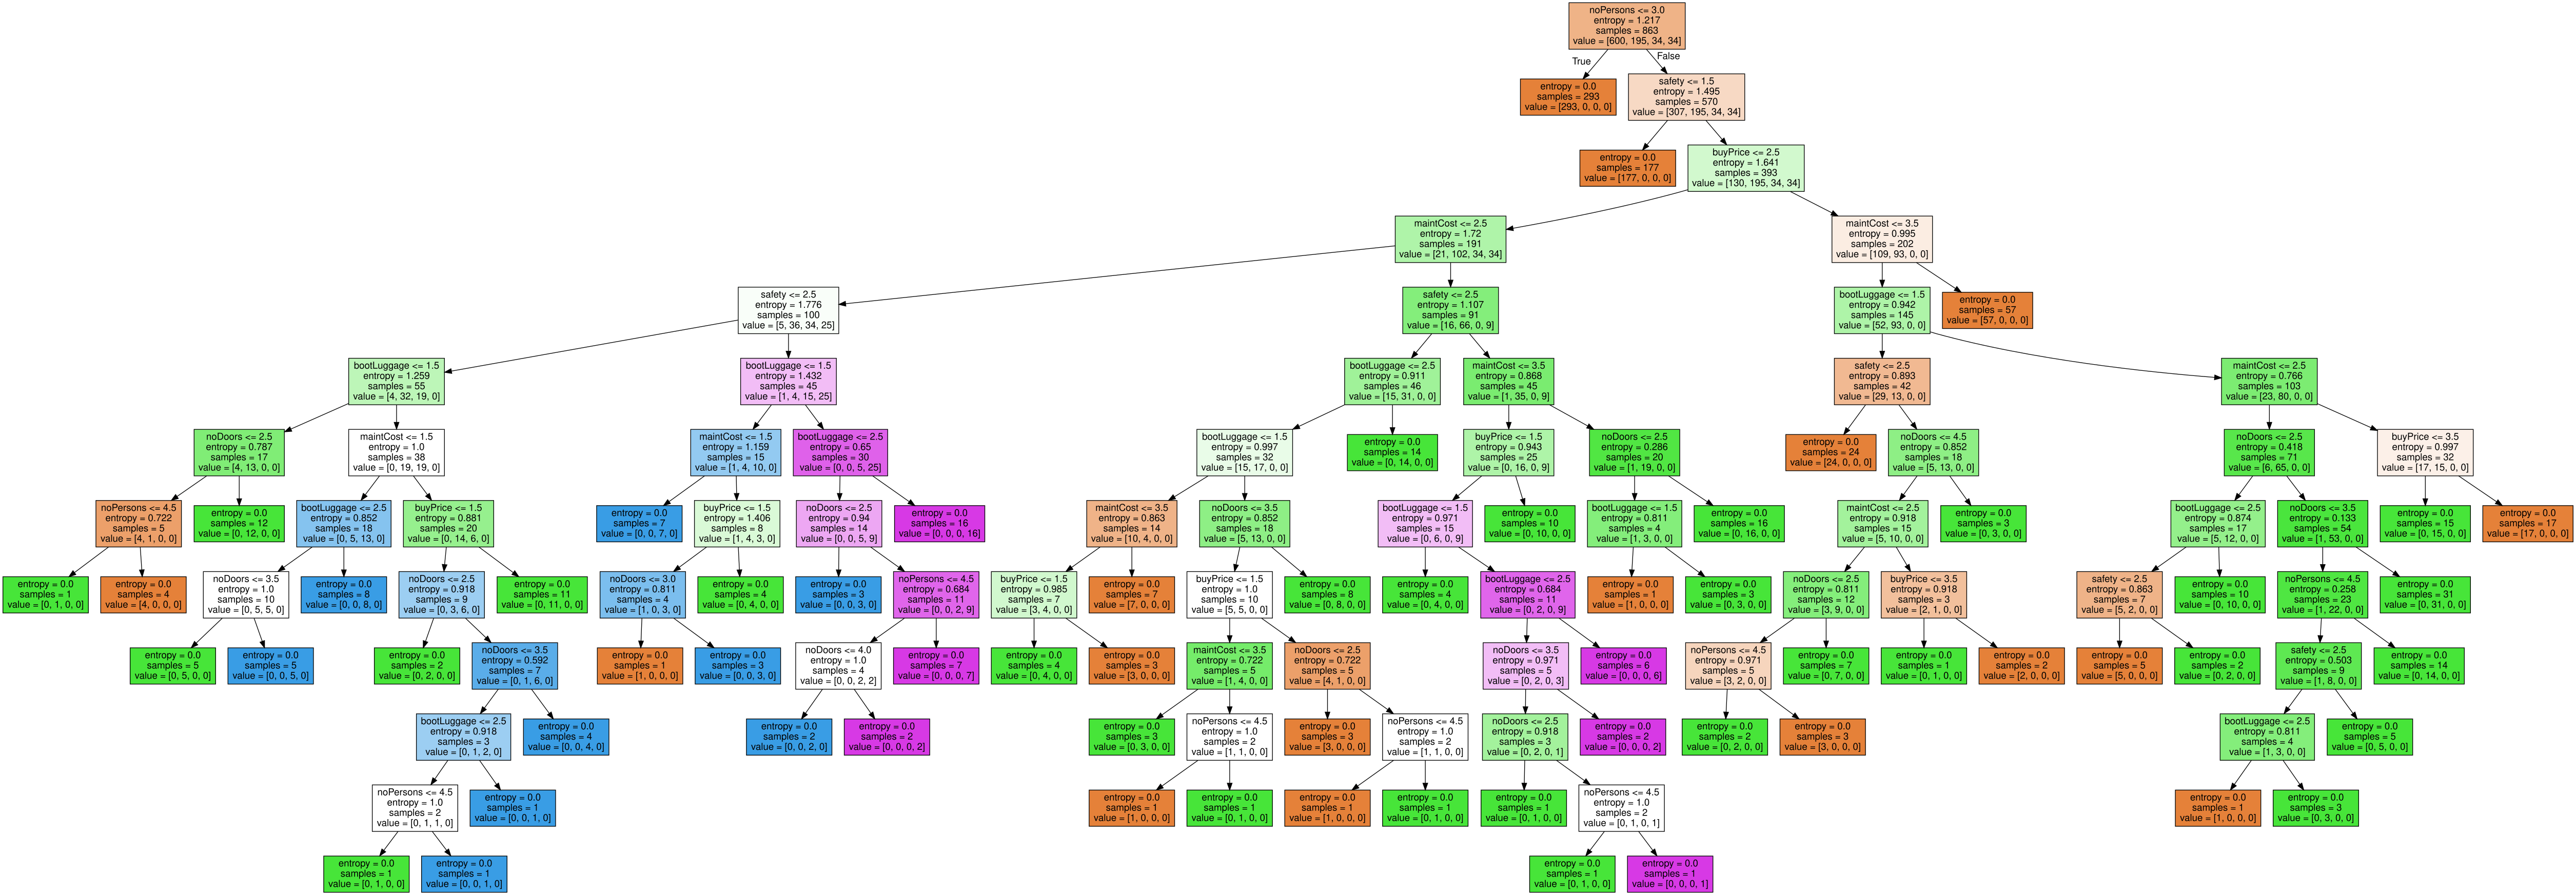

In [55]:
display(Image('tree_grid_clf_entropy.png', unconfined=True))

In [56]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [57]:
# Create an empty list accuracy
accuracy = []

# Create an empty list train_scores_models
test_scores_DT_models = []

# Create an empty list of models
DT_models = []

In [58]:
y_pred = clf_entropy.predict(X_test)

print (print("Accuracy test set: ", accuracy_score(y_test, y_pred)))

print (print("Precision test set: ", precision_score(y_test, y_pred, average = 'micro' )))
print (print("Recall test set: ", recall_score(y_test, y_pred, average = 'micro' )))
print (print("F-score test set: ", f1_score(y_test, y_pred, average = 'micro' )))

print (classification_report(y_test, y_pred))

Accuracy test set:  0.9664351851851852
None
Precision test set:  0.9664351851851852
None
Recall test set:  0.9664351851851852
None
F-score test set:  0.9664351851851852
None
              precision    recall  f1-score   support

           1       0.99      0.98      0.99       609
           2       0.92      0.97      0.95       189
           3       0.76      0.80      0.78        35
           4       1.00      0.87      0.93        31

    accuracy                           0.97       864
   macro avg       0.92      0.91      0.91       864
weighted avg       0.97      0.97      0.97       864



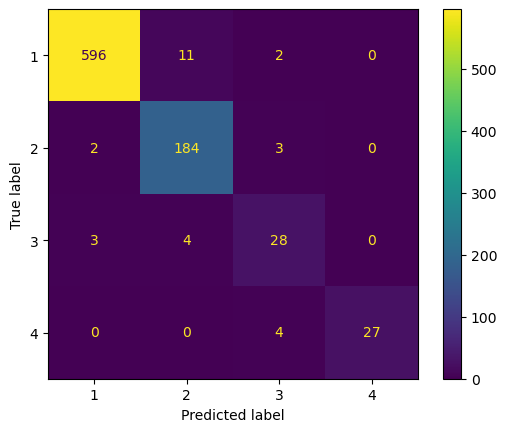

In [59]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf_entropy.classes_)
disp.plot()

In [63]:
clf_Gini = DecisionTreeClassifier(criterion='gini')
clf_Gini = clf_Gini.fit(X_train, y_train)


In [64]:
feature_name = df.columns[:-1]
target_name = df.columns[-1]

print(feature_name)
print(target_name)

Index(['buyPrice', 'maintCost', 'noDoors', 'noPersons', 'bootLuggage',
       'safety'],
      dtype='object')
decision


In [66]:
tree.export_graphviz(clf_Gini, out_file='tree_grid_clf_Gini.dot',
                     feature_names=feature_name,  
                     filled=True)

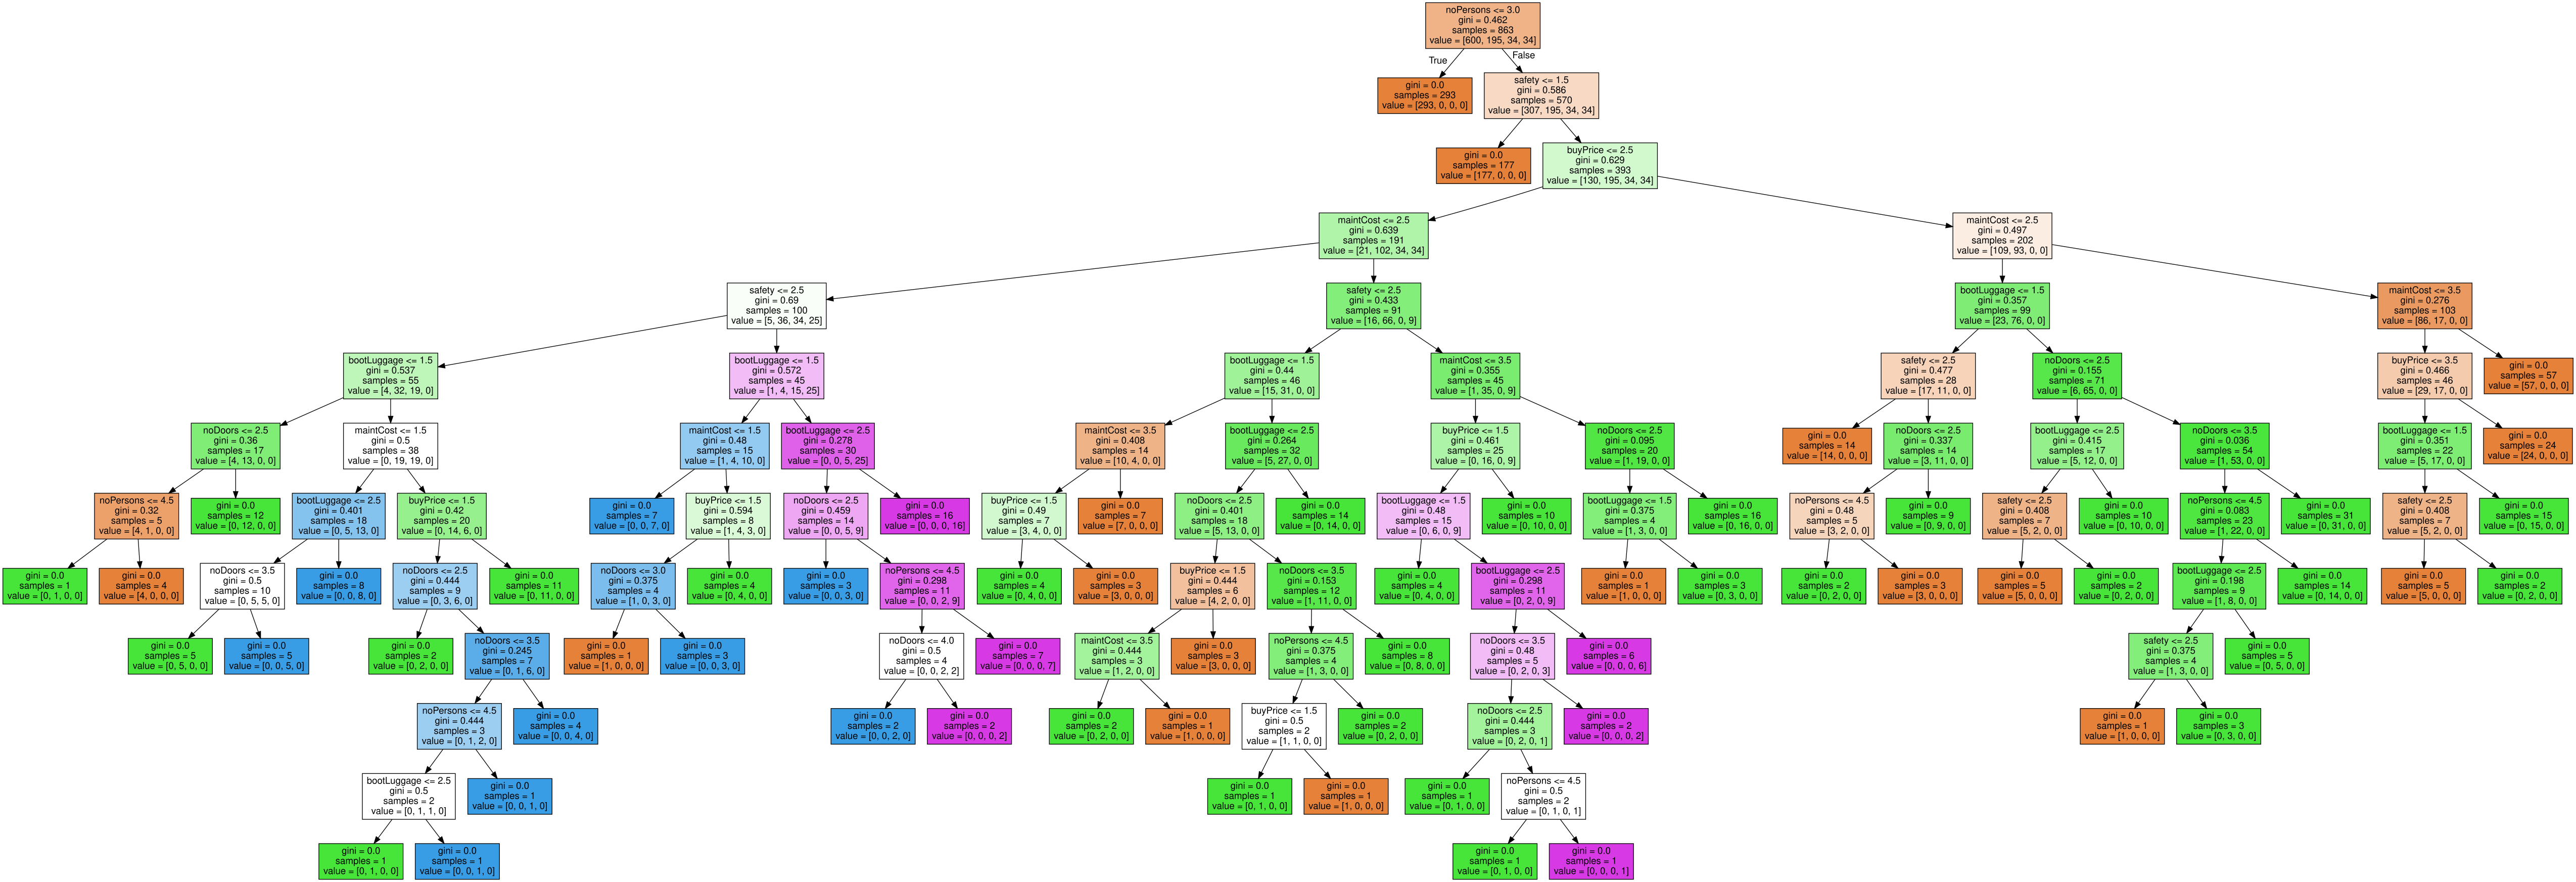

In [68]:
display(Image('tree_grid_clf_Gini.png', unconfined=True))

In [69]:
y_pred = clf_Gini.predict(X_test)

print (print("Accuracy test set: ", accuracy_score(y_test, y_pred)))

print (print("Precision test set: ", precision_score(y_test, y_pred, average = 'micro' )))
print (print("Recall test set: ", recall_score(y_test, y_pred, average = 'micro' )))
print (print("F-score test set: ", f1_score(y_test, y_pred, average = 'micro' )))

print (classification_report(y_test, y_pred))

Accuracy test set:  0.96875
None
Precision test set:  0.96875
None
Recall test set:  0.96875
None
F-score test set:  0.96875
None
              precision    recall  f1-score   support

           1       0.99      0.98      0.99       609
           2       0.93      0.97      0.95       189
           3       0.76      0.80      0.78        35
           4       1.00      0.87      0.93        31

    accuracy                           0.97       864
   macro avg       0.92      0.91      0.91       864
weighted avg       0.97      0.97      0.97       864



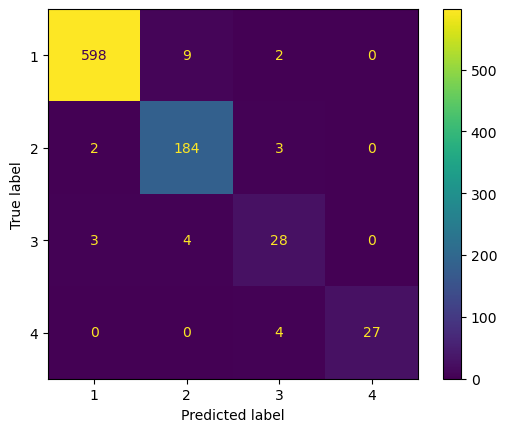

In [70]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf_Gini.classes_)
disp.plot()

In [71]:
clf_loss = DecisionTreeClassifier(criterion='log_loss')
clf_loss = clf_loss.fit(X_train, y_train)

In [72]:
feature_name = df.columns[:-1]
target_name = df.columns[-1]

print(feature_name)
print(target_name)

Index(['buyPrice', 'maintCost', 'noDoors', 'noPersons', 'bootLuggage',
       'safety'],
      dtype='object')
decision


In [75]:
tree.export_graphviz(clf_loss, out_file='tree_grid_clf_loss.dot',
                     feature_names=feature_name,  
                     filled=True)

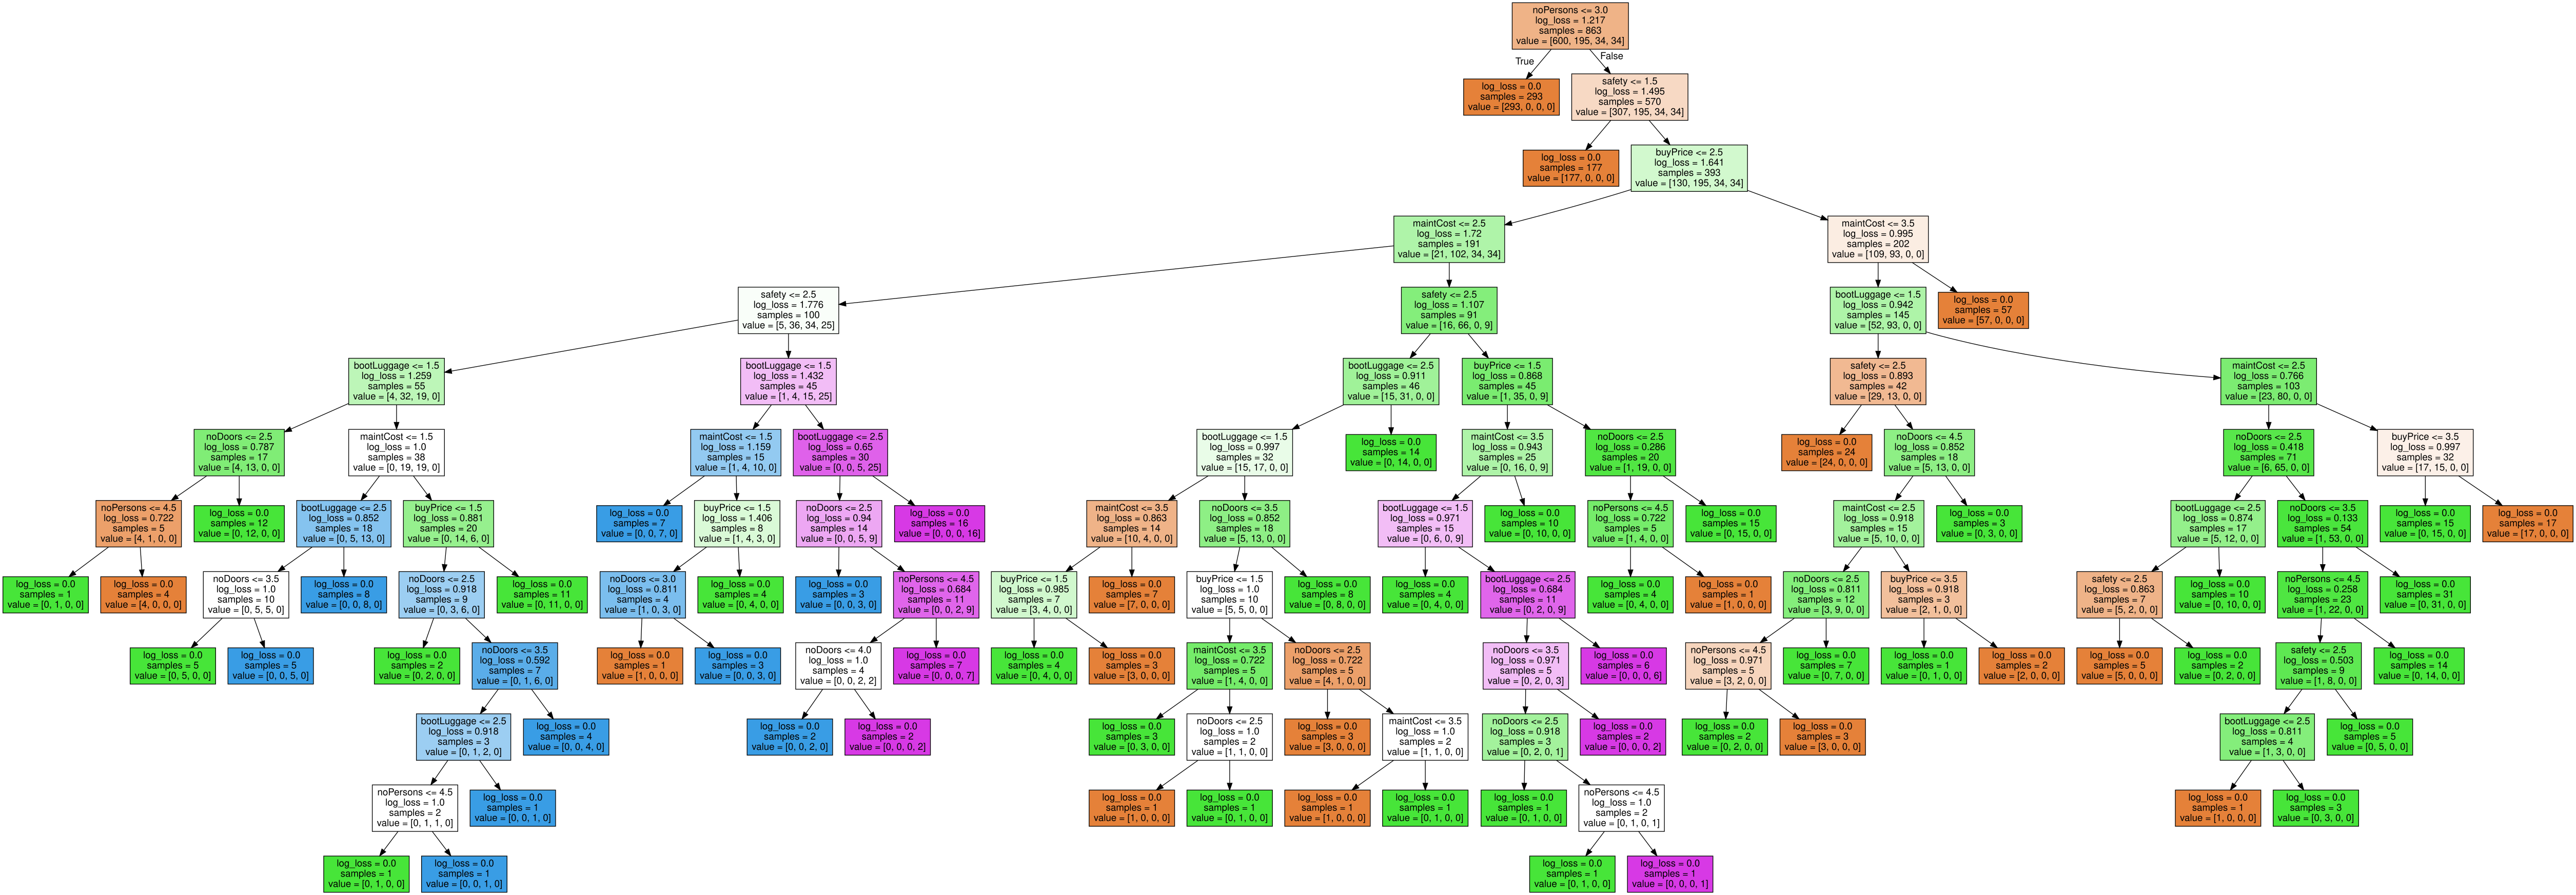

In [76]:
display(Image('tree_grid_clf_loss.png', unconfined=True))

In [77]:
y_pred = clf_loss.predict(X_test)

print (print("Accuracy test set: ", accuracy_score(y_test, y_pred)))

print (print("Precision test set: ", precision_score(y_test, y_pred, average = 'micro' )))
print (print("Recall test set: ", recall_score(y_test, y_pred, average = 'micro' )))
print (print("F-score test set: ", f1_score(y_test, y_pred, average = 'micro' )))

print (classification_report(y_test, y_pred))

Accuracy test set:  0.9618055555555556
None
Precision test set:  0.9618055555555556
None
Recall test set:  0.9618055555555556
None
F-score test set:  0.9618055555555556
None
              precision    recall  f1-score   support

           1       0.99      0.98      0.98       609
           2       0.92      0.96      0.94       189
           3       0.76      0.80      0.78        35
           4       1.00      0.87      0.93        31

    accuracy                           0.96       864
   macro avg       0.92      0.90      0.91       864
weighted avg       0.96      0.96      0.96       864



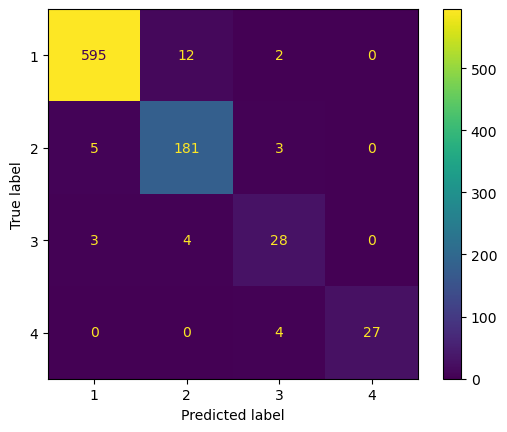

In [78]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf_loss.classes_)
disp.plot()

# Lab Logbook requirements. Answer the following questions and put in your lab logbook (Do not use more than 2 sentences for each question):


1.   What is the decision criterion at each node of the decision tree?
2.   How is entropy/gini index/loss change at each node?
3.   Is entropy decreasing or increasing in as we move down in tree?
4.   How many samples are left at each node? Can you see any pattern?
5.   What information is contained at leaf node?



In [ ]:
# Optional - The following is optional.

################################################################################
#
#
#Compare Decision tree performnce with SVM, KNN, and Logistic Regression.
# You can split your code into different cells according to your own choise
#
#
################################################################################